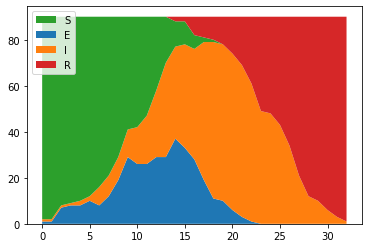

In [2]:

# Generate a school with 30 kids and parents
import matplotlib.pyplot as plt
from epidexus import Location, EpidexusModel, Person, SEIR
from itinerary_entries import FixedWeekItineraryEntry
from datetime import datetime, time, timedelta

start_date = datetime(year=2020, month=3, day=29)
sim_model = EpidexusModel(start_date, sim_time_step=timedelta(hours=1))

vks = Location(name="Væsterkæret Skole", infection_probability=0.01)

vks_it = FixedWeekItineraryEntry(vks, start_date.date(), monday=(time(8),time(14)),
                                                         tuesday=(time(8),time(14)),
                                                         wednesday=(time(8),time(14)),
                                                         thursday=(time(8),time(14)),
                                                         friday=(time(8),time(14)))

for i in range(30):
    hl = Location("Home-" + str(i), infection_probability=0.05)
    school_kid = Person(sim_model.next_id(), sim_model, hl)
    school_kid.itinerary.add_entry(vks_it)
    parent1 = Person(sim_model.next_id(), sim_model, hl)
    parent2 = Person(sim_model.next_id(), sim_model, hl)
    sim_model.add_person(school_kid)
    sim_model.add_person(parent1)
    sim_model.add_person(parent2)

# Hacking agent 0 to be infectious
sim_model.schedule.agents[0].infect()
sim_model.schedule.agents[0].infection_state.seir = SEIR.INFECTED

for i in range(800):
    sim_model.step()

seir = sim_model.datacollector.get_model_vars_dataframe()
ax = plt.subplot(1,1,1)
ax.stackplot(seir.axes[0], seir["E"], seir["I"], seir["S"], seir["R"], labels=["E", "I", "S", "R"])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[i] for i in [2,0,1,3]], [labels[i] for i in [2,0,1,3]],loc='upper left')

In [1]:
from datetime import datetime, timedelta, time
import matplotlib.pyplot as plt
from epidexus import EpidexusModel, Location, SEIR
from itinerary_entries import FixedWeekItineraryEntry
from world_creators import create_family, create_family_prob, claim_by_age

start_date = datetime(year=2020, month=3, day=29)
sim_model = EpidexusModel(start_date, timedelta(hours=1))
unemployed_people = []
locations = []
for i in range(50):
    up, home = create_family_prob(sim_model, 1.5, 0.5, 40, 10, 2.5, 1, 8, 5)
    unemployed_people += up
    locations.append(home)

#School
vks = Location(name="School", infection_probability=0.2)
locations.append(vks)
vks_it = FixedWeekItineraryEntry(vks, start_date.date(), monday=(time(8),time(14)),
                                                         tuesday=(time(8),time(14)),
                                                         wednesday=(time(8),time(14)),
                                                         thursday=(time(8),time(14)),
                                                         friday=(time(8),time(14)))
unemployed_people = claim_by_age(unemployed_people, vks_it, 6, 16, max_num=100);

#Kindergarten
kg = Location(name="Kindergarten", infection_probability=0.5)
locations.append(kg)
kg_it = FixedWeekItineraryEntry(kg, start_date.date(), monday=(time(8),time(16)),
                                                         tuesday=(time(8),time(16)),
                                                         wednesday=(time(8),time(16)),
                                                         thursday=(time(8),time(16)),
                                                         friday=(time(8),time(16)))
unemployed_people = claim_by_age(unemployed_people, kg_it, 3, 6, max_num=30);

#Workplaces
for i in range(3):
    wp = Location(name="Workplace " + str(i), infection_probability=0.05)
    locations.append(wp)
    wp_it = FixedWeekItineraryEntry(wp, start_date.date(), monday=(time(8),time(15)),
                                                            tuesday=(time(8),time(15)),
                                                            wednesday=(time(8),time(15)),
                                                            thursday=(time(8),time(15)),
                                                            friday=(time(8),time(15)))
    unemployed_people = claim_by_age(unemployed_people, wp_it, 16, 65, max_num=25);



Claiming Person id: 3, age: 8, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 4, age: 11, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 6, age: 11, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 8, age: 9, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 9, age: 6, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 11, age: 9, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 12, age: 8, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 17, age: 14, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 18, age: 6, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 26, age: 10, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 28, age: 12, gender: Unknown, infection state: Susceptible for School
Claiming Person id: 2

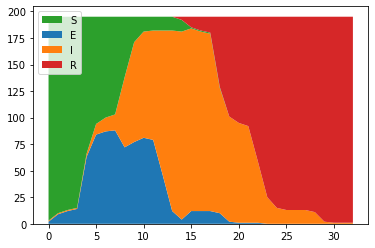

In [2]:
# Hacking agent 0 to be infectious
sim_model.schedule.agents[0].infect()
sim_model.schedule.agents[0].infection_state.seir = SEIR.INFECTED

for i in range(800):
    sim_model.step()

seir = sim_model.datacollector.get_model_vars_dataframe()
ax = plt.subplot(1,1,1)
ax.stackplot(seir.axes[0], seir["E"], seir["I"], seir["S"], seir["R"], labels=["E", "I", "S", "R"])
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[i] for i in [2,0,1,3]], [labels[i] for i in [2,0,1,3]],loc='upper left')